# Machine Learning of Sentiment Analysis

This section shows how to classify Tweets into different sentiment categories, postive, netural and negative with different models.

In [1]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer 
from collections import Counter
import pandas as pd
import numpy as np
import os
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import roc_auc_score


## Data Preprocessing

In [2]:
tweets_df=pd.read_csv('.\data\cleaned_data.csv',encoding='utf-8')
#tweets_df= tweets_df[(tweets_df.Sentiment != "Neutral")]
#tweets_df=tweets_df.drop(tweets_df['Sentiment']=='Neutural',axis=1)
X=tweets_df['text']
tweets_df.head()

,date,text,location,month,formatted_text,polarity,Subjectivity,Sentiment
0,09-12-2021,Everyone even if vaccinated should watch these...,"Pennsylvania, USA",9,everyone even vaccinated watch videos share co...,0.000000,0.000000,Neutral
1,16-11-2021,@MemHospitalNH Kudos to this dedicated team! 🏆...,"New Hampshire, USA",11,kudos dedicated team covid19vaccine,0.000000,0.000000,Neutral
2,14-11-2021,"Mandate or no mandate, getting a #COVID19Vacci...","Pennsylvania, USA",11,mandate mandate getting covid19vaccine best ke...,0.633333,0.433333,Positive
3,12-11-2021,https://t.co/ysXpCGuMra @BillGates @CDCgov #CO...,"Mississippi, USA",12,covid19vaccine bioweapon china,0.000000,0.000000,Neutral
4,10-11-2021,FREE #COVID19Vaccine clinic @DeckerPUSD on Su...,"California, USA",10,free covid19vaccine clinic sunday november dec...,0.400000,0.800000,Positive


In [117]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer

stop_words=stopwords.words('english')
punct=string.punctuation
stemmer=PorterStemmer()

import re
cleaned_data=[]
for i in range(len(X)):
  tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
  tweet=tweet.lower().split()
  tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
  tweet=' '.join(tweet)
  cleaned_data.append(tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zheng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Split the dataset into test and training

In [118]:
tweets_df['senti_label']=tweets_df.Sentiment.apply(lambda x: 0 if 'Negative'in x else 1 if 'Netural' else 5)
y=tweets_df['senti_label']
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
X_fin=cv.fit_transform(cleaned_data).toarray()
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3, random_state=123)

## Compare with different models

## Random forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=250, random_state=0) 
rf_clf.fit(X_train, y_train) 
y_pred1 = rf_clf.predict(X_test)

print("Results for Random forest")
print("ROC AUC: ", roc_auc_score(y_test, y_pred1))
print("Classification Report:",)
print(classification_report(y_test,y_pred1)) 
print("Accuracy:",accuracy_score(y_test,y_pred1))

Results for Random forest
ROC AUC:  0.7822040851578357
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       249
           1       0.94      0.98      0.96      1674

    accuracy                           0.93      1923
   macro avg       0.88      0.78      0.82      1923
weighted avg       0.93      0.93      0.92      1923

Accuracy: 0.9303172126885075


Text(0.5, 0.98, 'Confusion matrix for random forest')

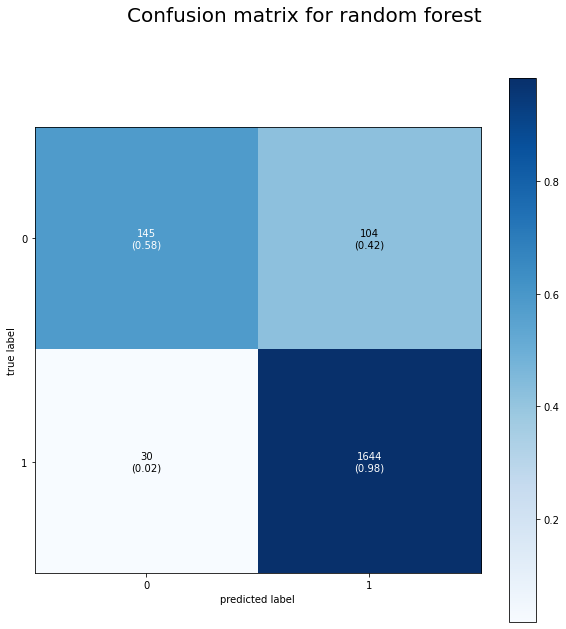

In [93]:
from mlxtend.plotting import plot_confusion_matrix
CR1=confusion_matrix(y_test,y_pred1)
fig,ax=plot_confusion_matrix(conf_mat=CR1,figsize=(10,10),show_absolute=True,show_normed=True,colorbar=True)
fig.suptitle('Confusion matrix for random forest', fontsize=20)

## Logistic Regression 

In [94]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [120]:
log_model = log_model.fit(X=X_train, y=y_train)
y_pred2 = log_model.predict(X_test)
print("Results for Logistic Regression")
print("ROC AUC: ", roc_auc_score(y_test, y_pred2))
print("Classification Report:",)
print(classification_report(y_test,y_pred2)) 
print("Accuracy:",accuracy_score(y_test,y_pred2))

Results for Logistic Regression
ROC AUC:  0.7312727612960803
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.47      0.61       249
           1       0.93      0.99      0.96      1674

    accuracy                           0.92      1923
   macro avg       0.89      0.73      0.78      1923
weighted avg       0.92      0.92      0.91      1923

Accuracy: 0.921996879875195


Text(0.5, 0.98, 'Confusion matrix for logistic regression')

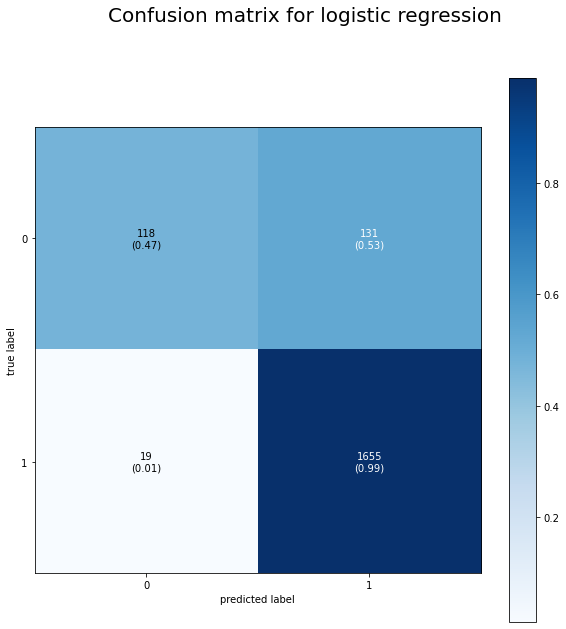

In [96]:
CR2=confusion_matrix(y_test,y_pred2)
fig,ax=plot_confusion_matrix(conf_mat=CR2,figsize=(10,10),show_absolute=True,show_normed=True,colorbar=True)
fig.suptitle('Confusion matrix for logistic regression', fontsize=20)

https://regenerativetoday.com/a-complete-sentiment-analysis-project-using-pythons-scikit-learn/

## Support Vector Machine

In [122]:
#Support Vector Machine
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.3, random_state=123)
#Vectorizing the text data
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn import svm#Training the model
svcl = svm.SVC()
svcl.fit(ctmTr, y_train)
svcl_score = svcl.score(X_test_dtm, y_test)
print("Results for Support Vector Machine")
y_pred3 = svcl.predict(X_test_dtm)
print("ROC AUC: ", roc_auc_score(y_test, y_pred3))
print("Classification Report:",)
print(classification_report(y_test,y_pred3)) 
print("Accuracy:",accuracy_score(y_test,y_pred3))

Results for Support Vector Machine
ROC AUC:  0.6224899598393574
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.24      0.39       249
           1       0.90      1.00      0.95      1674

    accuracy                           0.90      1923
   macro avg       0.95      0.62      0.67      1923
weighted avg       0.91      0.90      0.88      1923

Accuracy: 0.9022360894435777


Text(0.5, 0.98, 'Confusion matrix for Support Vector Machine')

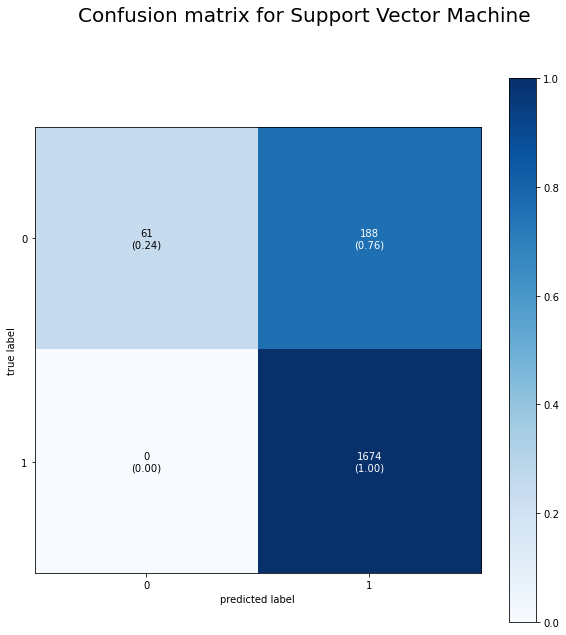

In [98]:
CR3=confusion_matrix(y_test,y_pred3)
fig,ax=plot_confusion_matrix(conf_mat=CR3,figsize=(10,10),show_absolute=True,show_normed=True,colorbar=True)
fig.suptitle('Confusion matrix for Support Vector Machine', fontsize=20)

## K Nearest Neighbor

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.3, random_state=123)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(ctmTr, y_train)
knn_score = knn.score(X_test_dtm, y_test)
print("Results for KNN Classifier with CountVectorizer")
y_pred4 = knn.predict(X_test_dtm)
print("ROC AUC: ", roc_auc_score(y_test, y_pred4))
print("Classification Report:",)
print(classification_report(y_test,y_pred4)) 
print("Accuracy:",accuracy_score(y_test,y_pred4))

Results for KNN Classifier with CountVectorizer
ROC AUC:  0.6018122669891033
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.20      0.34       249
           1       0.89      1.00      0.94      1674

    accuracy                           0.90      1923
   macro avg       0.93      0.60      0.64      1923
weighted avg       0.90      0.90      0.87      1923

Accuracy: 0.8959958398335933


Text(0.5, 0.98, 'Confusion matrix for K Nearest Neighbor')

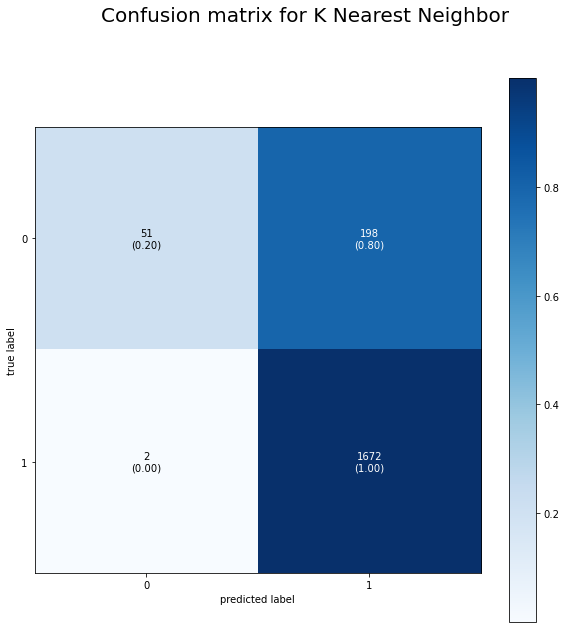

In [100]:
CR4=confusion_matrix(y_test,y_pred4)
fig,ax=plot_confusion_matrix(conf_mat=CR4,figsize=(10,10),show_absolute=True,show_normed=True,colorbar=True)
fig.suptitle('Confusion matrix for K Nearest Neighbor', fontsize=20)

## Evaluate the model

- the most optimal: random forest

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x1 = vectorizer.fit_transform(cleaned_data)
y1 = tweets_df['senti_label']

vectorizer = TfidfVectorizer(min_df=15)
x1  = vectorizer.fit_transform(cleaned_data)

from sklearn.feature_selection import SelectKBest, chi2
# select the 500 features that have the strongest correlation to a class from the remaining 
selected_features = \
SelectKBest(chi2, k=500).fit(x1, y1).get_support(indices=True)
vectorizer = TfidfVectorizer(min_df=15, vocabulary=selected_features)
x1 = vectorizer.fit_transform(cleaned_data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=123)

In [108]:
rf_clf.fit(x1,y1)
test_sentence = vectorizer.transform(['I love covidvaccine!'])
rf_clf.predict_proba(test_sentence)

array([[0.13118602, 0.86881398]])